In [6]:
import pandas as pd
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #visualisasi kata

#### Load Data

In [8]:
df = pd.read_csv("dataset/diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


#### Data Understanding

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [10]:
(df.isna().sum()/len(df)) * 100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

In [16]:
# Function to count outliers using IQR
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Count outliers in each numerical column
outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    outlier_counts[col] = count_outliers_iqr(df[col])

# Convert the result into a DataFrame for easier viewing
outliers_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

# Display the outlier counts DataFrame
outliers_counts_df

,Column,Outlier Count
0,Pregnancies,74
1,Glucose,88
2,BloodPressure,83
3,SkinThickness,13
4,Insulin,80
5,BMI,68
6,DiabetesPedigreeFunction,87
7,Age,74
8,Outcome,0


In [17]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

#### EDA

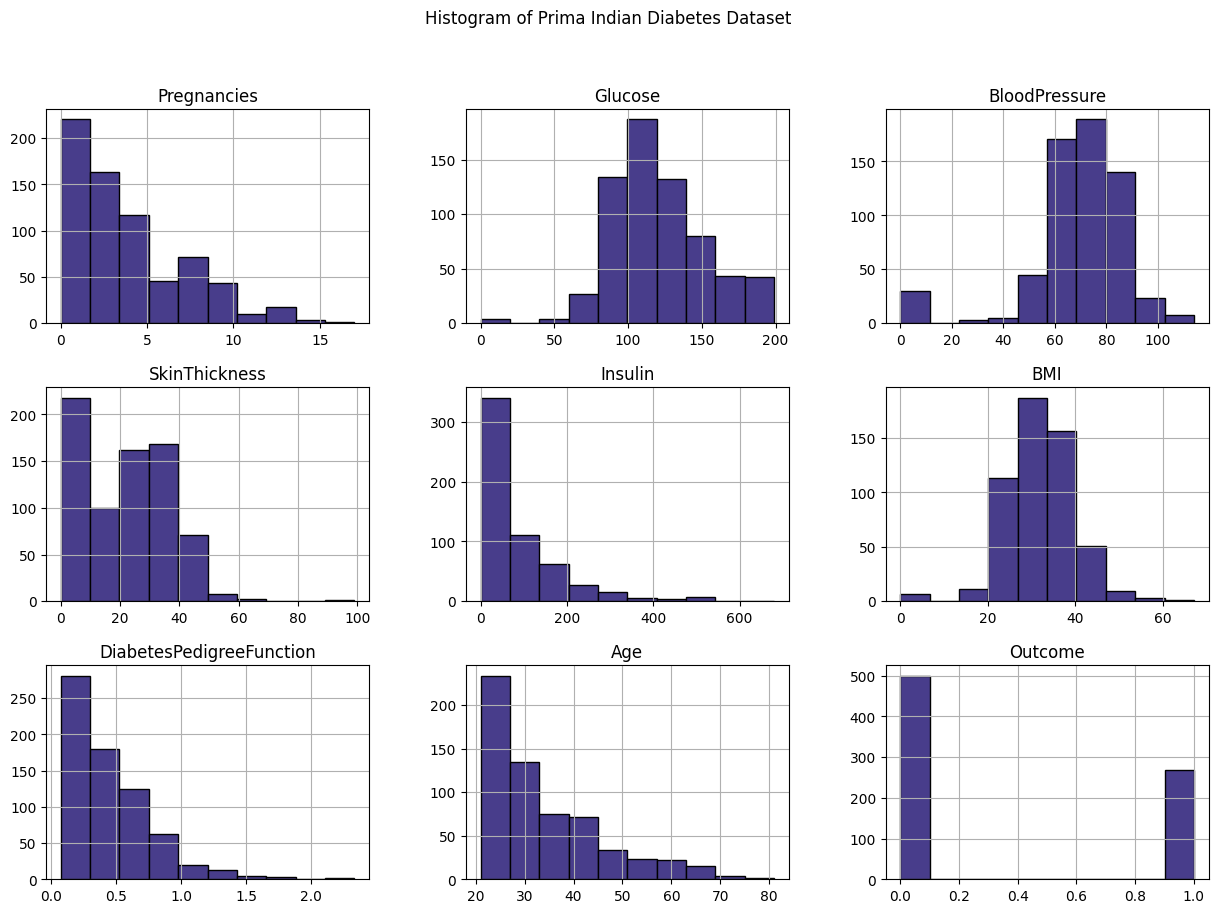

In [44]:
def plot_histograms(data):
    data.hist(bins=10, figsize=(15,10), layout=(3,3), color='darkslateblue', edgecolor='black')
    plt.suptitle("Histogram of Prima Indian Diabetes Dataset")
    plt.show()

plot_histograms(df)

<Axes: xlabel='count', ylabel='Outcome'>

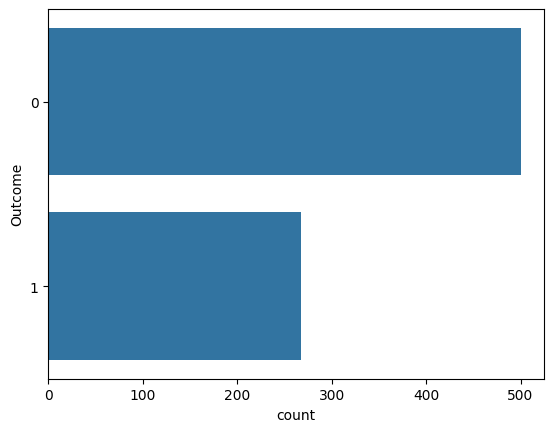

In [28]:
sns.countplot(data=df, y='Outcome')

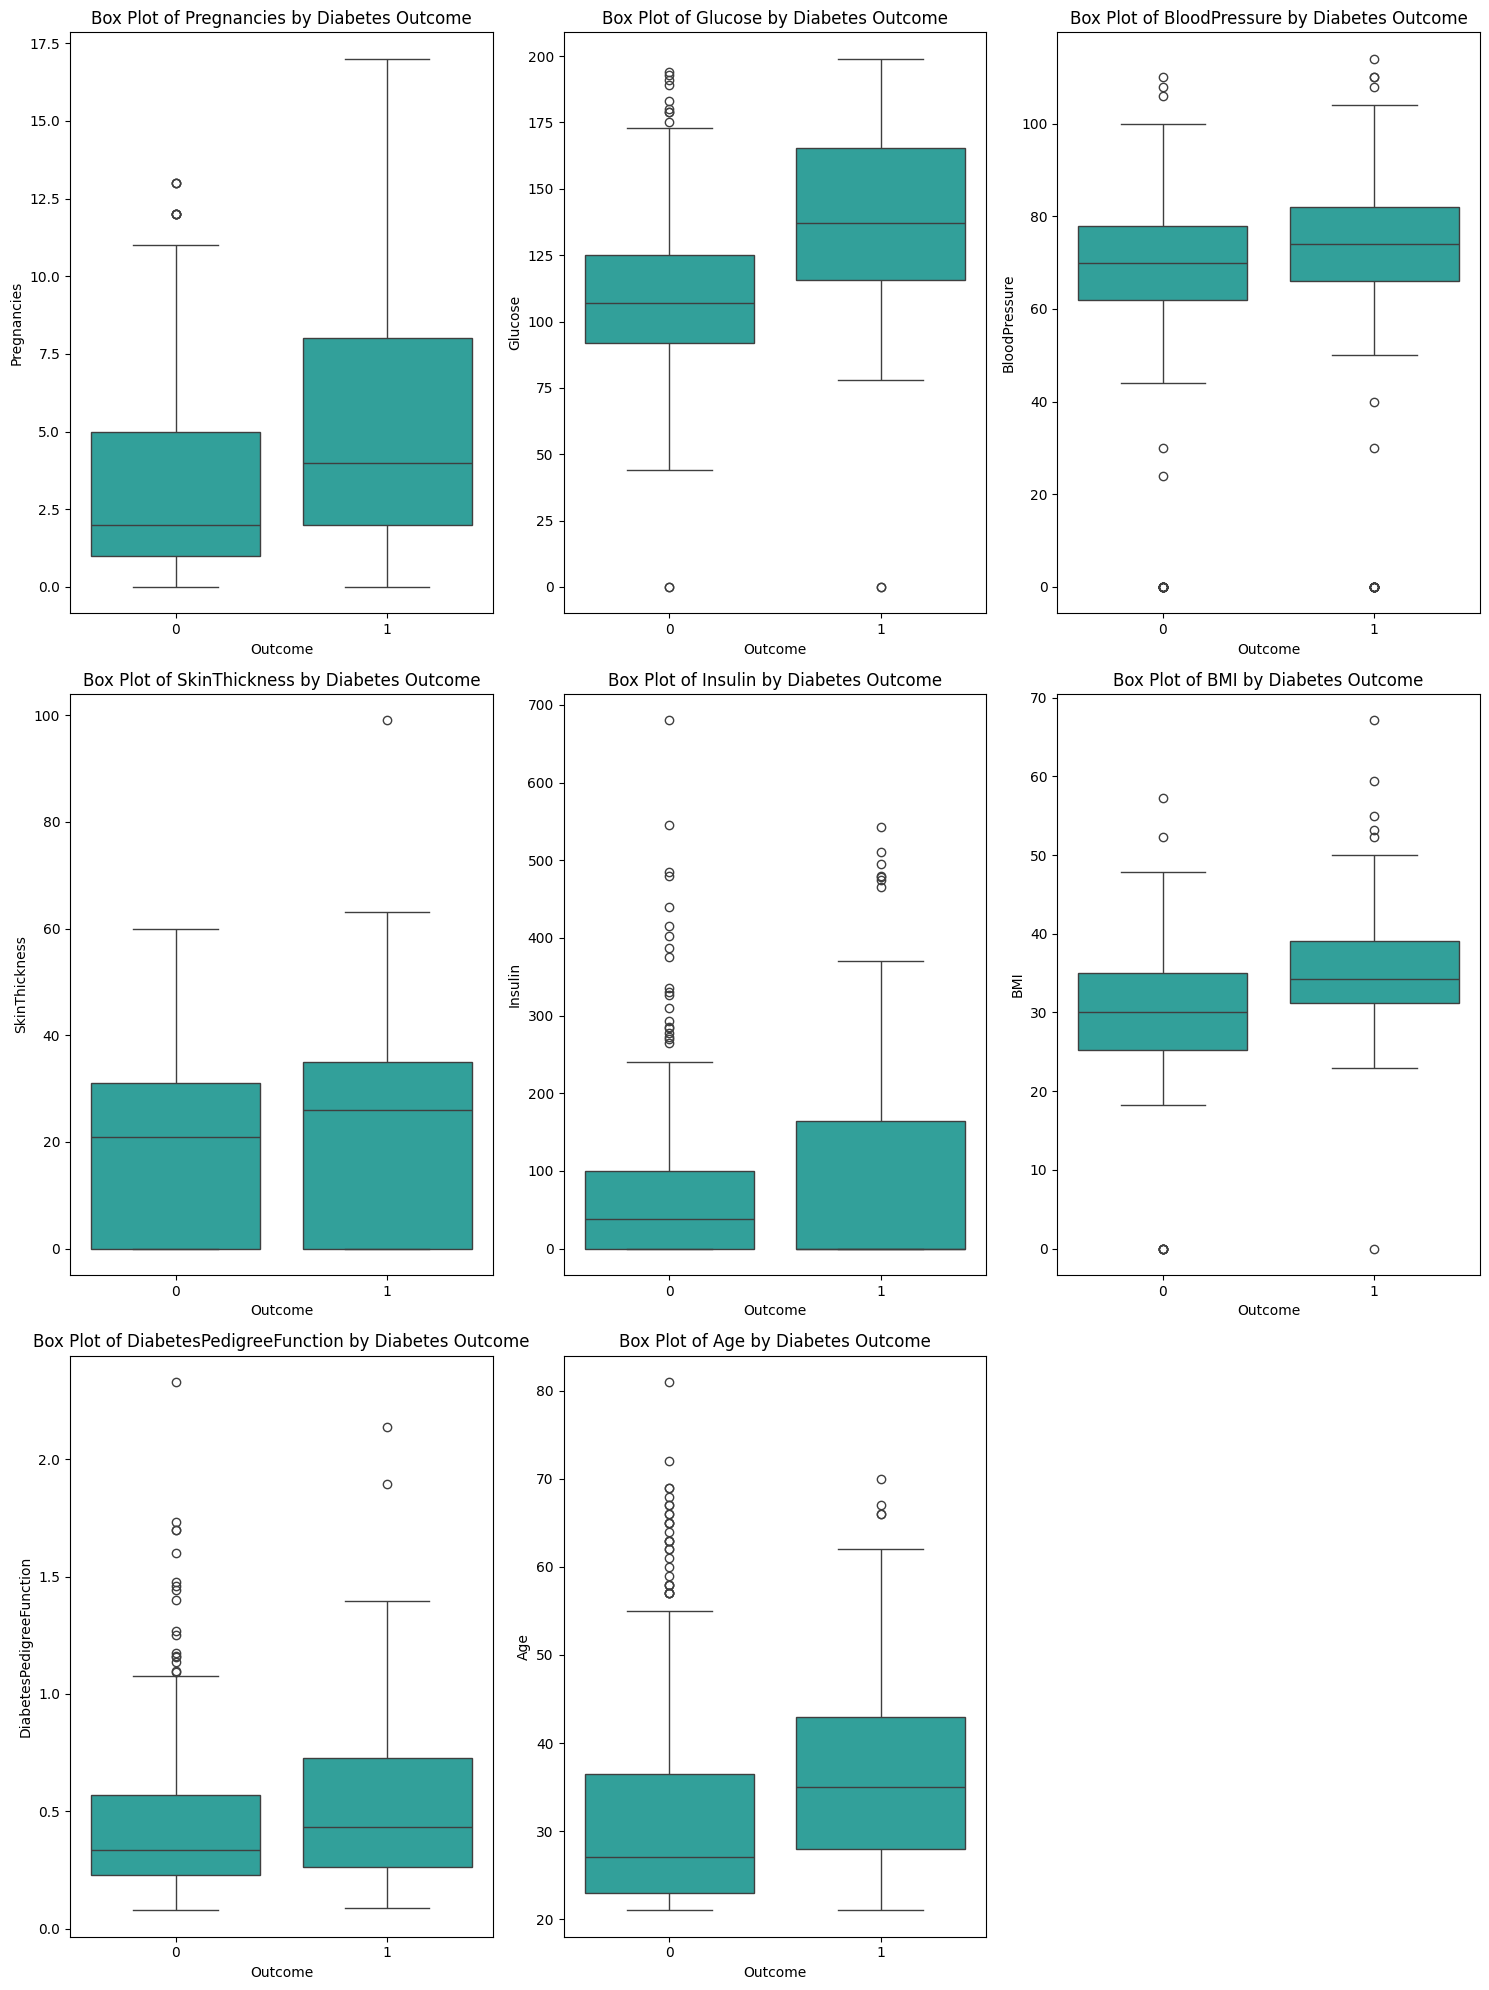

In [41]:
def plot_boxplots(data):
    plt.figure(figsize=(15, 20))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x='Outcome', y=column, data=data, color='lightseagreen')
        plt.title(f'Box Plot of {column} by Diabetes Outcome')
    plt.tight_layout() # perbaikan layout
    plt.show()

# Pastikan df adalah DataFrame Anda yang sudah ada
plot_boxplots(df)

<Axes: >

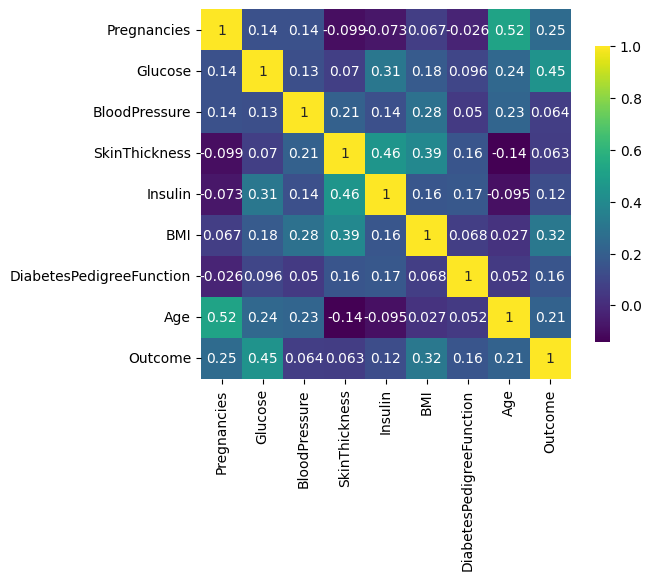

In [36]:
sns.heatmap(df.corr(), annot=True, cmap='viridis', square=True, cbar_kws={'shrink': .8})

#### Load Data (for text visualization)

In [45]:
df_text = pd.read_excel('dataset/foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


In [46]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductID          5000 non-null   object
 1   Helpfulness_Score  5000 non-null   int64 
 2   Rating             5000 non-null   int64 
 3   Review_Title       5000 non-null   object
 4   Text               5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


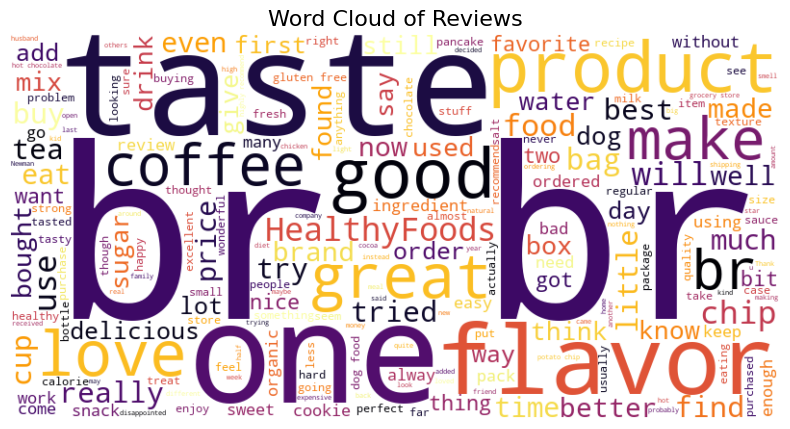

In [50]:
text = " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Reviews", fontsize=16)
    plt.show()

plot_wordcloud(text)

#### Preprocessing

In [51]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [52]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [53]:
x = df.drop('Outcome', axis=1)
y = df["Outcome"]

In [54]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

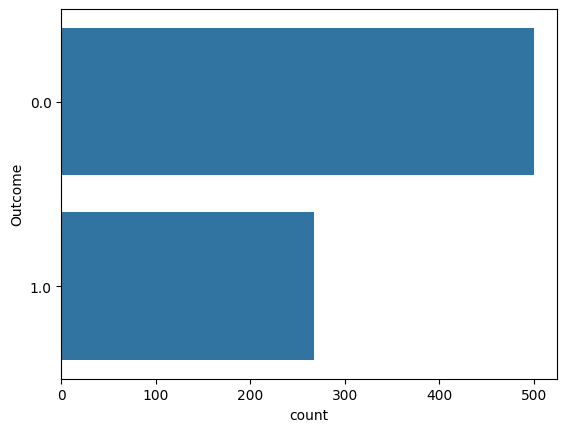

In [55]:
sns.countplot(data=df, y=y)

<Axes: ylabel='count'>

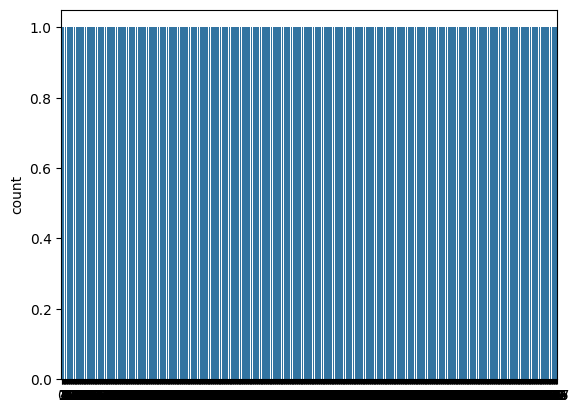

In [56]:
sns.countplot(y)

<Axes: ylabel='count'>

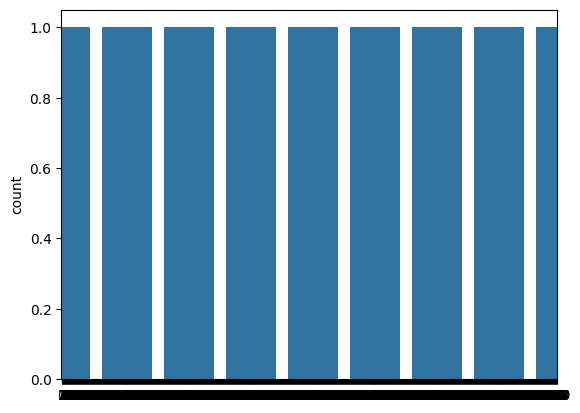

In [57]:
sns.countplot(y_resampled)

<Axes: xlabel='count', ylabel='Outcome'>

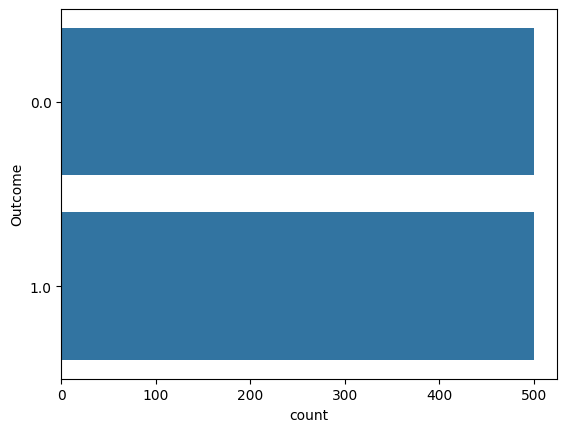

In [58]:
sns.countplot(data=x_resampled, y=y_resampled)

In [59]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

In [60]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.631452,1.341835,0.161894,0.908335,-0.76215,0.145083,0.509503,0.240117
1,-0.961083,-1.342873,-0.161927,0.524391,-0.76215,0.293467,-0.424487,-0.249300
2,1.268466,1.937693,-0.269867,-1.331339,-0.76215,-1.374370,0.661784,-0.151417
